# Importing packages

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt

# Functions to parse

In [2]:
def parse_website(url):
    wsite = requests.get(url)
    if wsite.status_code != 200:
        print('Error loading website '+url)
    else:
        c = wsite.content
        soup = BeautifulSoup(c, 'html.parser')
        return soup

In [3]:
def set_title(soup):
    title = ''
    name = soup.find('h1', {'class':'o-hero-freepage__title f-title-3'}).get_text().strip()
    
    return title + name

In [4]:
def set_description(soup):
    description = 'Undefined'
    section = soup.find('div', {'class': 'm-block__content f-rte f-rte--block'})
    if section.get_text() == None:
        ps = section.find_all('p')
        for p in ps:
            if ('ant to know more about this policy' in p.get_text()) == False:
                end = p.get_text().find('\n', 0)
                s = p.get_text()[:end].strip()
                description = s
    else:
        text = section.get_text().strip()
        end = text.find('\n', 0)
        s = text[0:end]
        description = s.strip()
    description = description.replace('\t',' ')
    description = description.replace('\n',' ')
    description = description.replace('\r',' ')
    return description

In [5]:
def set_source_and_last_updated(soup):
    source = 'Undefined'
    last_updtd = 'Undefined'
    subtitles = soup.find_all('span', {'class':'o-hero-freepage__meta'})
    for subtitle in subtitles:
        if 'Source:' in subtitle.get_text():
            source = subtitle.get_text().replace('Source: ', '').strip()
        elif 'pdated' in subtitle.get_text():
            last_updtd = subtitle.get_text().replace('Last updated: ', '').strip()
    return source,last_updtd

In [6]:
def set_learn_more(soup):
    learn_more = 'Undefined'
    link = soup.find('a', {'class': 'a-link a-link--accent'})
    if link != None:
        learn_more = link.attrs['href']
        split_string = learn_more.split("\n", 1)
        learn_more = split_string[0].strip()
    return learn_more

In [7]:
def set_main_content(soup):
    topics = ''
    policy_types = ''
    sectors = ''
    technologies = ''
    end_uses = ''
    
    content_list = soup.find_all('div', {'class': 'o-policy-content__list'})
    for content in content_list:
        category = content.span.get_text().strip()
        ls = content.find_all('span', {'class': 'a-tag__label'})
        if category == 'Topics':
            for i,find in enumerate(ls):
                if i != (len(ls)-1):
                    topics = topics + find.get_text().strip()+'|'
                else:
                    topics = topics + find.get_text().strip()
        elif category == 'Policy types':
            for i,find in enumerate(ls):
                if i != (len(ls)-1):
                    policy_types = policy_types + find.get_text().strip()+'|'
                else:
                    policy_types = policy_types + find.get_text().strip()
        elif category == 'Sectors':
            for i,find in enumerate(ls):
                if i != (len(ls)-1):
                    sectors = sectors + find.get_text().strip()+'|'
                else:
                    sectors = sectors + find.get_text().strip()
        elif category == 'Technologies':
            for i,find in enumerate(ls):
                if i != (len(ls)-1):
                    technologies = technologies + find.get_text().strip()+'|'
                else:
                    technologies = technologies + find.get_text().strip()
        elif category == 'End uses covered':
            ls2 = content.find_all('li', {'class': 'o-policy-content-list__item'})
            for i,find in enumerate(ls2):
                if i != (len(ls2)-1):
                    end_uses = end_uses + find.get_text().strip()+'|'
                else:
                    end_uses = end_uses + find.get_text().strip()
    if topics == '':
        topics = 'Undefined'
    if policy_types == '':
        policy_types = 'Undefined'
    if sectors == '':
        sectors = 'Undefined'
    if technologies == '':
        technologies = 'Undefined'
    if end_uses == '':
        end_uses = 'Undefined'
    return topics, policy_types, sectors, technologies, end_uses

In [8]:
def set_side_content(soup):
    country = ''
    year = 0
    status = ''
    jurisdiction = ''

    sidebar_list = soup.find_all('li', {'class': 'o-page__aside-item o-page__aside-item--policy'})

    for content in sidebar_list:
        category = content.span.get_text()
        ls = content.find_all('span', {'class': 'o-policy-aside-item__value'})
        if category == 'Country':
            for find in ls:
                country = find.get_text().strip()
        elif category == 'Year':
            for find in ls:
                year = year + int(find.get_text().strip())
        elif category == 'Status':
            for find in ls:
                status = find.get_text().strip()
        elif category == 'Jurisdiction':
            for find in ls:
                jurisdiction = find.get_text().strip()

    return country, year, status, jurisdiction

# Creating dictionary with the name of the policy and its url

In [9]:
policy_data = {}
wsite_root = "https://www.iea.org/policies?page="
i=1
while i < 187:
    wsite_address = wsite_root + str(i)
    print(str(i/187*100)+ r'%, current address: '+wsite_address)
    wsite = requests.get(wsite_address)
    if wsite.status_code != 200:
        print('Error loading website, page '+str(i))
    else:
        c = wsite.content
        soup = BeautifulSoup(c, 'html.parser')
        for policy in soup.find_all('a',{'class':'m-policy-listing-item__link'}):
            title = policy.string.strip()
            policy_data[title] = policy.attrs['href']
    i = i+1

0.53475935828877%, current address: https://www.iea.org/policies?page=1
1.06951871657754%, current address: https://www.iea.org/policies?page=2
1.6042780748663104%, current address: https://www.iea.org/policies?page=3
2.13903743315508%, current address: https://www.iea.org/policies?page=4
2.6737967914438503%, current address: https://www.iea.org/policies?page=5
3.2085561497326207%, current address: https://www.iea.org/policies?page=6
3.7433155080213902%, current address: https://www.iea.org/policies?page=7
4.27807486631016%, current address: https://www.iea.org/policies?page=8
4.81283422459893%, current address: https://www.iea.org/policies?page=9
5.347593582887701%, current address: https://www.iea.org/policies?page=10
5.88235294117647%, current address: https://www.iea.org/policies?page=11
6.417112299465241%, current address: https://www.iea.org/policies?page=12
6.951871657754011%, current address: https://www.iea.org/policies?page=13
7.4866310160427805%, current address: https://www

# Creating list of rows of policies

In [10]:
csv_rows = []
address = 'https://www.iea.org'
for i,policy in enumerate(policy_data):
    url = address + policy_data[policy]
    print(str(i/len(policy_data)*100) + r'%, current address: ' + url)
    soup = parse_website(url)
    if soup != None:
        title = set_title(soup)
        description = set_description(soup)
        source,last_updtd = set_source_and_last_updated(soup)
        learn_more = set_learn_more(soup)
        topics, policy_types, sectors, technologies, end_uses = set_main_content(soup)
        country, year, status, jurisdiction = set_side_content(soup)
        
        row = [title, url, description, source, last_updtd, learn_more, topics, policy_types, sectors, technologies, end_uses, country, year, status, jurisdiction]

        for item in row:
            if isinstance(item, str):
                item = item.strip()

        csv_rows.append(row)

0.0%, current address: https://www.iea.org/policies/17194-climate-law-2023
0.018515089798185523%, current address: https://www.iea.org/policies/11663-fuel-economy-standards-on-light-duty-vehicles
0.037030179596371046%, current address: https://www.iea.org/policies/12654-emissions-limit-on-the-capacity-market-regulations
0.05554526939455656%, current address: https://www.iea.org/policies/8506-gas-boilers-replacement-by-low-carbon-heating-systems
0.07406035919274209%, current address: https://www.iea.org/policies/3124-local-government-fleet-renewal-mandate
0.09257544899092761%, current address: https://www.iea.org/policies/17615-memorandum-on-natura-2000-permits-in-connection-with-mining-operations
0.11109053878911312%, current address: https://www.iea.org/policies/17451-new-zealand-energy-strategy
0.12960562858729863%, current address: https://www.iea.org/policies/16656-european-institute-of-innovation-and-technology-raw-materials-project-call
0.14812071838548418%, current address: http

# Creating CSV

In [11]:
final_df = pd.DataFrame(data=csv_rows, columns = ['Policy', 'URL', 'Description', 'Source', 'Last updated', 'Learn more', 'Topics', 'Policy types', 'Sectors', 'Technologies', 'End uses', 'Country', 'Year', 'Status', 'Jurisdiction'])

In [12]:
final_df['Last updated'] = pd.to_datetime(final_df['Last updated'], format='%d %B %Y')

In [13]:
bad_rows = []
for i,date in enumerate(final_df['Last updated']):
    if isinstance(date, datetime) == False:
        print(i)
        bad_rows.append(i)

In [14]:
final_df.to_csv('./policies_database_IEA.csv', index=False)

# Testing

In [13]:
#test=r'https://www.iea.org/policies/5810-the-special-tax-law-on-production-and-services?q=The%20special%20Tax%20Law%20on%20Production%20and%20Services'
#soup = parse_website(test)
#title=set_title(soup)
#description = set_description(soup)
#source,last_updtd = set_source_and_last_updated(soup)
#learn_more = set_learn_more(soup)
#topics, policy_types, sectors, technologies, end_uses = set_main_content(soup)
#country, year, status, jurisdiction = set_side_content(soup)

# Plotting

In [114]:
regions = pd.read_excel('./R5_regions_countries.xlsx')

In [126]:
regions_df = final_df.merge(regions, left_on='Country', right_on='updated_name')

In [165]:
def create_value_counts(df, column):
    category = df[column]
    category = category.to_frame()
    sub_df = category[column].str.split('|', expand=True)
    all_elements = []
    for c in sub_df:
        for item in sub_df[c]:
            all_elements.append(item)
    all_elements_df = pd.DataFrame(all_elements, columns=['all'])
    return all_elements_df['all'].value_counts()

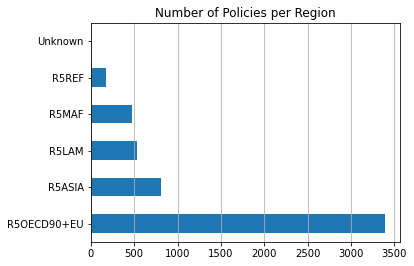

In [219]:
# Number of policies per region
fig, ax = plt.subplots(figsize=(5.85,3.8))#nrows=3, ncols=2, figsize=(8.3,11.7))
regions_df['r5region'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)#[0][0])
ax.set_title('Number of Policies per Region')
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_region.pdf')

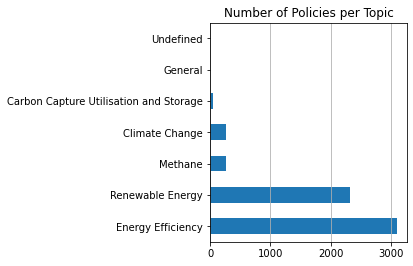

In [220]:
# Number of policies per topics

fig, ax = plt.subplots(figsize=(5.85,3.8))
create_value_counts(final_df, 'Topics').sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_title('Number of Policies per Topic')
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_topic.pdf')

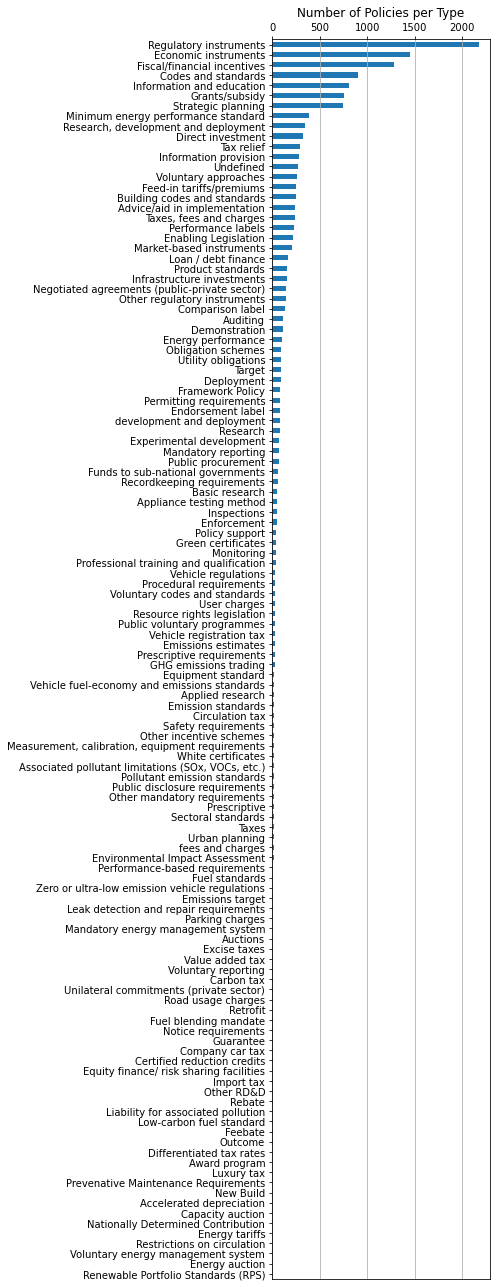

In [221]:
# Number of policies per policy type

fig, ax = plt.subplots(figsize=(7,18))
create_value_counts(final_df, 'Policy types').sort_values().plot(kind='barh', ax=ax)
ax.set_title('Number of Policies per Type')
ax.xaxis.tick_top()
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_type.pdf')

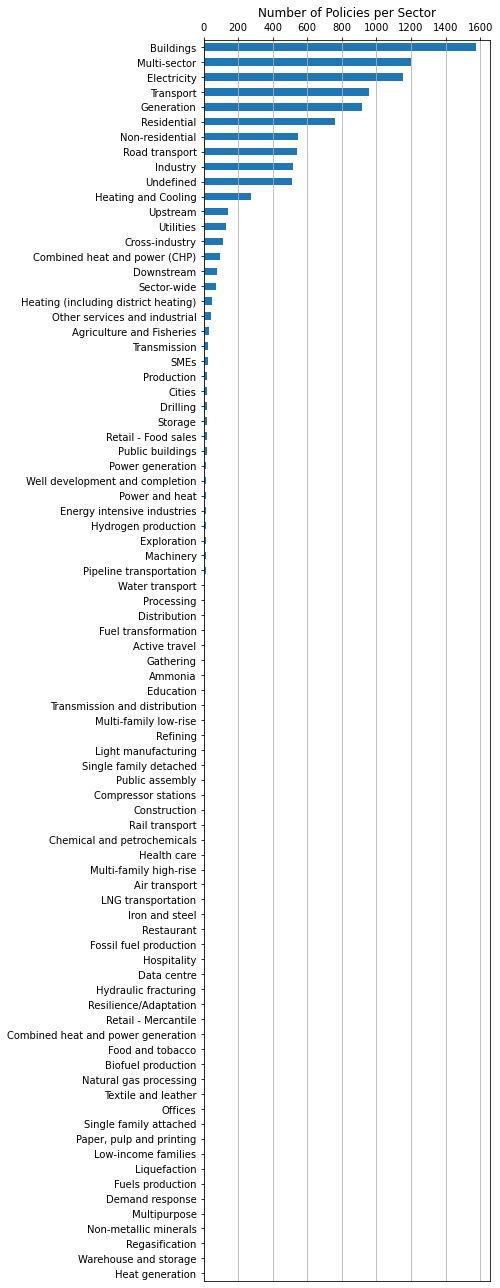

In [222]:
# Number of policies per sector

fig, ax = plt.subplots(figsize=(7,18))
create_value_counts(final_df, 'Sectors').sort_values().plot(kind='barh', ax=ax)
ax.set_title('Number of Policies per Sector')
ax.xaxis.tick_top()
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_sector.pdf')

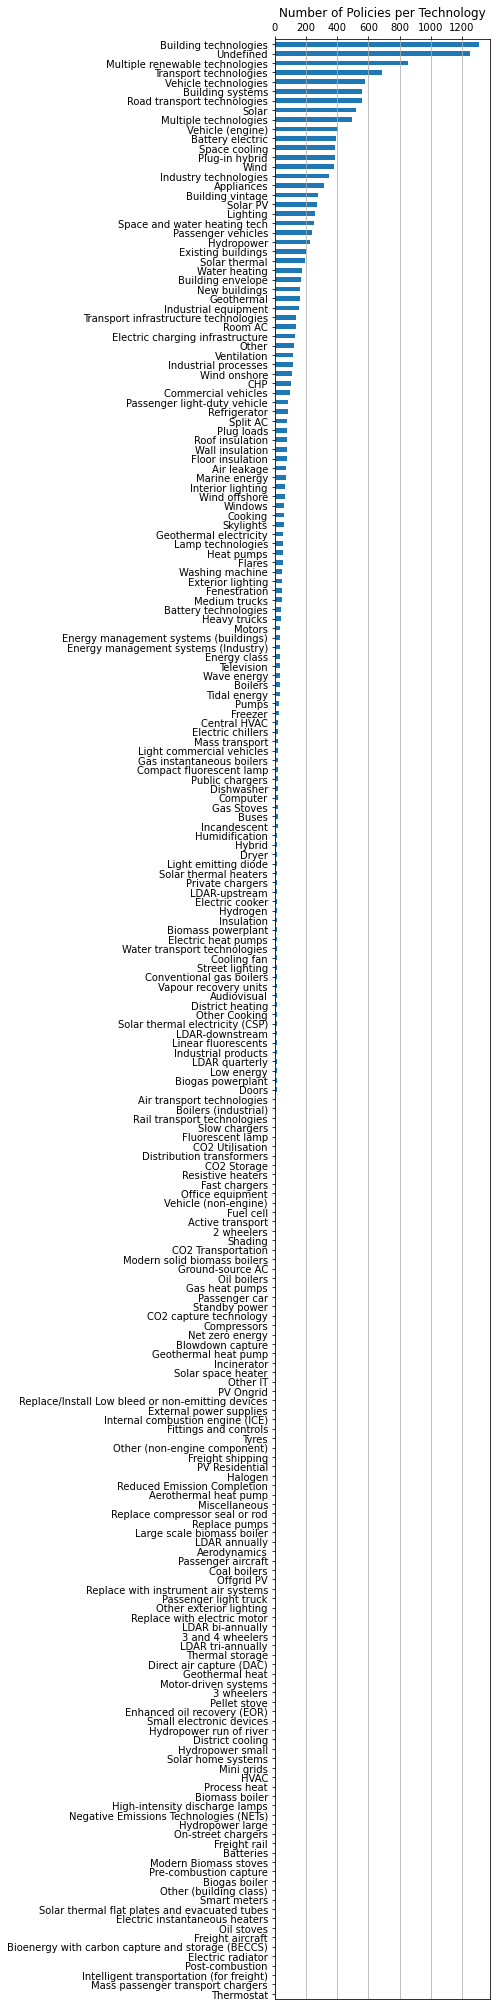

In [223]:
# Number of policies per technology

fig, ax = plt.subplots(figsize=(7,28))
create_value_counts(final_df, 'Technologies').sort_values().plot(kind='barh', ax=ax)
ax.set_title('Number of Policies per Technology')
ax.xaxis.tick_top()
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_technology.pdf')

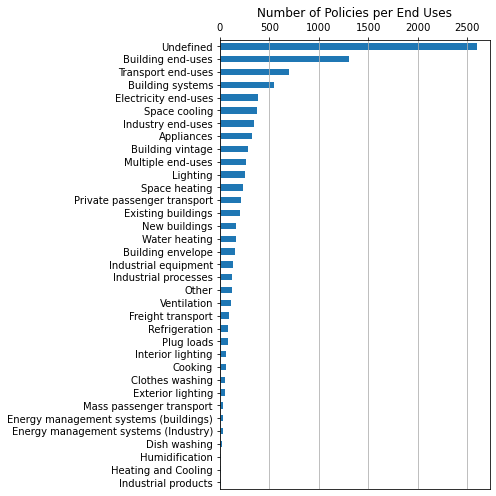

In [224]:
# Number of policies per end uses

fig, ax = plt.subplots(figsize=(7,7))
create_value_counts(final_df, 'End uses').sort_values().plot(kind='barh', ax=ax)
ax.set_title('Number of Policies per End Uses')
ax.xaxis.tick_top()
plt.tight_layout()
plt.grid(axis='x')
plt.savefig('./policies_per_end_uses.pdf')